In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import GridSearchCV
# 将数据重复拆分为训练集和测试集，使用训练集训练估计器，并根据交叉验证的每次迭代的测试集计算分数
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics  # 分类结果评价函数
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
from joblib import dump
from joblib import load
from imblearn.over_sampling import SMOTE
import time
from sklearn.ensemble import RandomForestRegressor

In [2]:
start = time.time()

In [3]:
data_train = pd.read_csv(r'C:\Users\25231\Desktop\practice\JJYC\B_features_score.csv',  encoding='utf-8')
print(data_train.head())

    score      Id_0      Id_1      Id_2      Id_3   Id_4      Id_5   Id_6  \
0      54  0.042975  0.000462  0.000000  0.398763    0.0  0.023646    0.0   
1      66  0.031797  0.037090  0.036816  0.357005    0.0  0.139336    0.0   
2      28  0.065749  0.000000  0.008945  0.406510    0.0  0.032852    0.0   
3      48  0.024629  0.066100  0.368672  0.106908    0.0  0.238965    0.0   
4      55  0.145221  0.000000  0.227552  0.264056    0.0  0.000052    0.0   

       Id_7   Id_8  ...   Id_141   Id_142   Id_143   Id_144   Id_145   Id_146  \
0  0.447370      0  ...      0.0      0.0      0.0      0.0      0.0        0   
1  0.291738      0  ...      0.0      0.0      0.0      0.0      0.0        0   
2  0.000000      0  ...      0.0      0.0      0.0      0.0      0.0        0   
3  0.111699      0  ...      0.0      0.0      0.0      0.0      0.0        0   
4  0.304401      0  ...      0.0      0.0      0.0      0.0      0.0        0   

    Id_147   Id_148   Id_149   Id_150  
0        0

In [4]:
# # 训练数据的输入特征
# x = data_train[['Id_0','Id_1','Id_2','Id_3','Id_4','Id_5','Id_6','Id_7','Id_8','Id_9',
#                 'Id_10','Id_11', 'Id_12', 'Id_13', 'Id_14', 'Id_15', 'Id_16', 'Id_17', 'Id_18',
#                 'Id_19', 'Id_20', 'Id_21', 'Id_22', 'Id_23', 'Id_24', 'Id_25', 'Id_26', 'Id_27',
#                 'Id_28', 'Id_29', 'Id_30', 'Id_31', 'Id_32', 'Id_33', 'Id_34', 'Id_35', 'Id_36',
#                 'Id_37', 'Id_38', 'Id_39', 'Id_40', 'Id_41', 'Id_42', 'Id_43', 'Id_44', 'Id_45',
#                 'Id_46', 'Id_47', 'Id_48', 'Id_49', 'Id_50', 'Id_51', 'Id_52', 'Id_53', 'Id_54',
#                 'Id_55', 'Id_56', 'Id_57', 'Id_58', 'Id_59', 'Id_60', 'Id_61', 'Id_62', 'Id_63',
#                 'Id_64', 'Id_65', 'Id_66', 'Id_67', 'Id_68', 'Id_69', 'Id_70', 'Id_71', 'Id_72',
#                 'Id_73', 'Id_74', 'Id_75', 'Id_76', 'Id_77', 'Id_78', 'Id_79', 'Id_80', 'Id_81',
#                 'Id_82', 'Id_83', 'Id_84', 'Id_85', 'Id_86', 'Id_87', 'Id_88', 'Id_89', 'Id_90',
#                 'Id_91', 'Id_92', 'Id_93', 'Id_94', 'Id_95', 'Id_96', 'Id_97', 'Id_98', 'Id_99',
#                 'Id_100', 'Id_102', 'Id_103', 'Id_104', 'Id_105', 'Id_106', 'Id_107', 'Id_108', 'Id_109',
#                 'Id_110', 'Id_112', 'Id_113', 'Id_114', 'Id_115', 'Id_116', 'Id_117', 'Id_118', 'Id_119',
#                 'Id_120', 'Id_121', 'Id_122', 'Id_123', 'Id_124', 'Id_125', 'Id_126', 'Id_127', 'Id_128',
#                 'Id_129', 'Id_130', 'Id_131', 'Id_132', 'Id_133', 'Id_134', 'Id_135', 'Id_136', 'Id_137',
#                 'Id_138', 'Id_139', 'Id_140', 'Id_141', 'Id_142', 'Id_143', 'Id_144', 'Id_145', 'Id_146',
#                 'Id_147', 'Id_148', 'Id_149', 'Id_150']]
# y = data_train['score']  # 定义功能区类型标签
print(data_train.columns)


Index([' score', ' Id_0', ' Id_1', ' Id_2', ' Id_3', ' Id_4', ' Id_5', ' Id_6',
       ' Id_7', ' Id_8',
       ...
       ' Id_141', ' Id_142', ' Id_143', ' Id_144', ' Id_145', ' Id_146',
       ' Id_147', ' Id_148', ' Id_149', ' Id_150'],
      dtype='object', length=152)


In [5]:
x = data_train.iloc[1:, 1:152].values

In [6]:
print(x)

[[0.03179688 0.03708984 0.03681641 ... 0.         0.         0.        ]
 [0.0657487  0.         0.00894531 ... 0.         0.         0.        ]
 [0.02462891 0.06610026 0.36867187 ... 0.         0.         0.        ]
 ...
 [0.03994141 0.01929688 0.01537109 ... 0.         0.         0.        ]
 [0.01352213 0.03345052 0.28424479 ... 0.         0.         0.        ]
 [0.0714974  0.00147135 0.01203776 ... 0.         0.         0.        ]]


In [7]:
y = data_train.iloc[1:, 0].values

In [8]:
print(y)

[66 28 48 55 75 74 73 67 29 50 74 77 45 30 48 42 31 37 42 48 40 46 65 41
 50 26 45 46 48 20 47 65 66 54 49 51 52 53 56 55 56 53 29 51 49 38 44 37
 55 39 48 49 55 48 34 58 52 65 61 50 48 45 61 73 48 47 55 46 47 63 52 60
 70 33 27 53 52 52 51 62 57 60 49 51 47 30 60 41 60 58 37 45 57 58 64 52
 31 65 52 46 60 51 44 54 53 60 52 39 52 50 51 46 54 46 56 49 51 50 51 58
 62 47 48 56 55 43 36 65 46 62 41 47 48 36 54 51 74 52 70 51 72 60 72 42
 42 46 45 52 51 60 47 35 46 48 63 45 42 47 45 50 68 36 46 48 49 48 40 51
 44 43 45 63 58 48 52 63 64 49 35 26 84 67 48 25 73 58 74 48 41 58 55 66
 38 62 56 72 53 27 69]


In [10]:
#看哪个参数好 是基尼系数还是绝对误差，结果发现是基尼系数，所以后面调参都用基尼系数
RF = RandomForestRegressor(random_state = 66)
score = cross_val_score(RF,x,y,cv=10).mean()
print('基尼系数得分: %.4f'%score)

基尼系数得分: 0.5454


In [11]:
RF = RandomForestRegressor(criterion = 'absolute_error',random_state = 66)
score = cross_val_score(RF,x,y,cv=10).mean()
print('绝对误差: %.4f'%score)

绝对误差: 0.5439


最优参数以及最高得分: [471.           0.55556791]


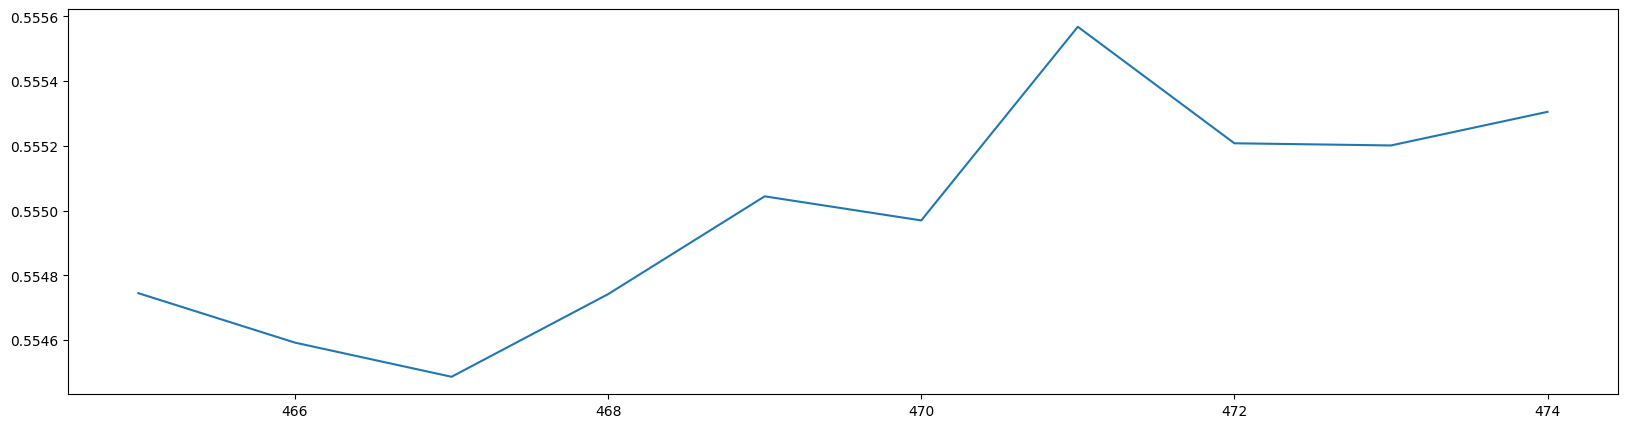

In [12]:
##调n_estimators参数,最后发现471是最优值，后面就用471
ScoreAll = []
for i in range(465,475,1):
    DT = RandomForestRegressor(n_estimators = i,random_state = 66) #,criterion = 'entropy'
    score = cross_val_score(DT,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)
max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

最优参数以及最高得分: [8.         0.55533747]


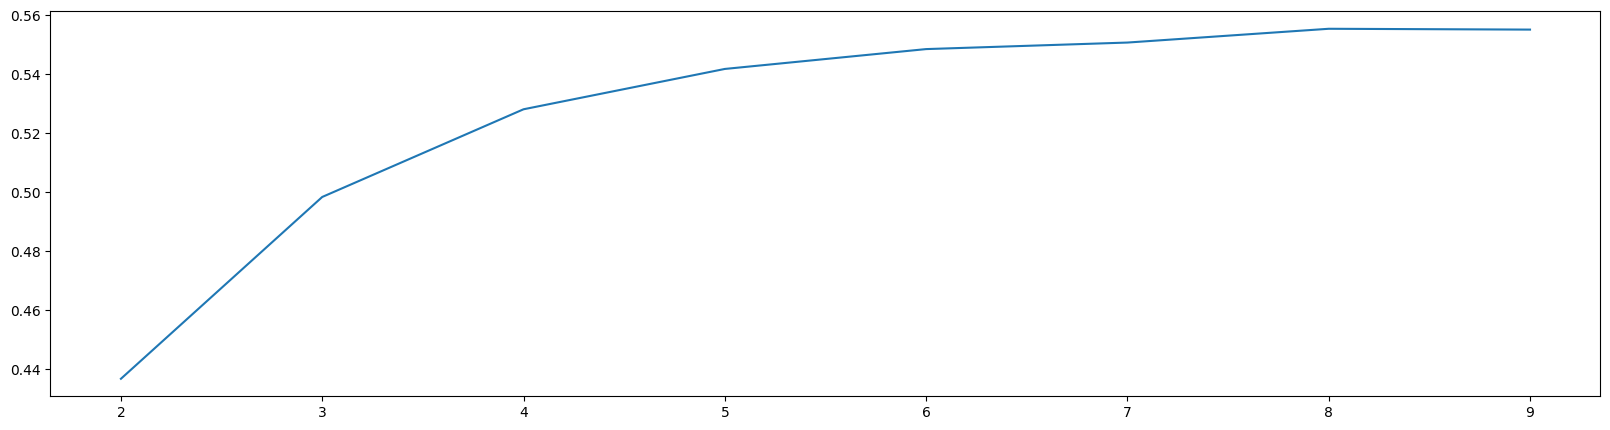

In [13]:
###粗调max_depth参数，发现最优值是8 用于下面调参
ScoreAll = []
for i in range(2,10,1):
    DT = RandomForestRegressor(n_estimators = 471,random_state = 66,max_depth =i ) #,criterion = 'entropy'
    score = cross_val_score(DT,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)
max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

最优参数以及最高得分: [4.         0.55927681]


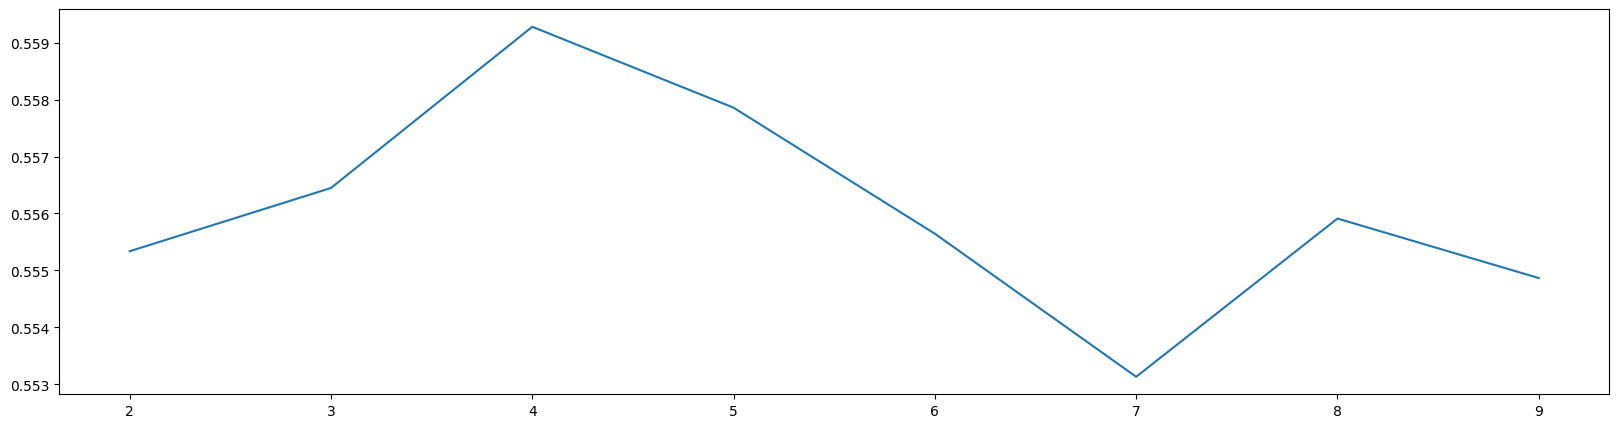

In [14]:
###调min_samples_split参数，确定最优值为4，就可以继续下面的调参
ScoreAll = []
for i in range(2,10,1):
    RF = RandomForestRegressor(n_estimators = 471,random_state = 66,max_depth =8,min_samples_split = i) #,criterion = 'entropy'
    score = cross_val_score(RF,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

最优参数以及最高得分: [1.         0.55927681]


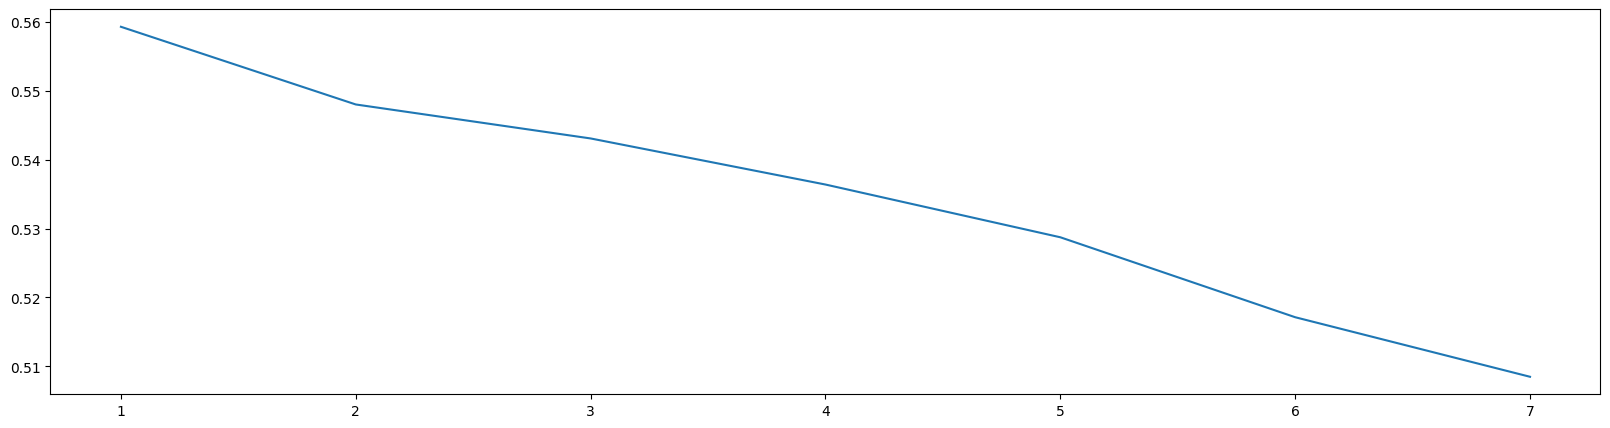

In [15]:
###调min_samples_leaf参数，最优值为1，继续后面的调参
ScoreAll = []
for i in range(1,8,1):
    DT = RandomForestRegressor(n_estimators = 471,random_state = 66,max_depth =8,min_samples_leaf = i,min_samples_split = 4 )
    score = cross_val_score(DT,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [16]:
#调max_features参数
param_grid = {'max_features':np.arange(0.1, 1)}
rfc = RandomForestRegressor(random_state=66,n_estimators = 471,max_depth = 8,min_samples_leaf =1 ,min_samples_split =4 )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(x,y)
print(GS.best_params_)
print(GS.best_score_)

{'max_features': 0.1}
0.5270919333753139


In [17]:
#在最优参数附近进行小范围的网格搜索，排出相互影响的因素'max_depth': , 'max_features': 0.1, 'min_samples_leaf': 51, 'min_samples_split': 12, 'n_estimators': 73}
#精度为0.772293869737418
param_grid = {
   'n_estimators':np.arange(460, 480),
   'max_depth':np.arange(6, 13),
   'min_samples_leaf':np.arange(1, 10),
   'min_samples_split':np.arange(2, 10),
    'max_features':np.arange(0.1, 0.2)
 }

In [18]:
rfc = RandomForestRegressor(random_state=66)
GS = GridSearchCV(rfc,param_grid,cv=10)

In [19]:
def print_best_score(gsearch, param_test):
     print("最优模型准确率: %0.3f" % gsearch.best_score_)
     print("最优模型参数:")
     # 随机森林分类器中超参数的最优值
     best_parameters = gsearch.best_estimator_.get_params()
     for param_name in sorted(param_test.keys()):
         print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
GS.fit(x,y)
GS.cv_results_, GS.best_params_, GS.best_score_
print_best_score(GS, param_grid)

In [ ]:
# cv_results_本身就是一个字典形式的输出，包含遍历的参数（'params'）、模型准确率（'mean_test_score'），时间（time）等
CVF1 = GS.cv_results_['mean_test_score']
CVparams = GS.cv_results_['params']

print(GS.best_params_)
print(GS.best_score_)

In [50]:
# 输出GridSearchCV()方法遍历超参数以及对应模型的F1值
for CVF1, CVparams in zip(CVF1, CVparams):
     # 将随机森林模型准确率以及对应的随机森林超参数输出到数据框params_accuracy中
    params_accuracy = pd.DataFrame(GS.cv_results_).loc[:, ['mean_test_score', 'params']]
params_accuracy.to_csv('C:/Users/25231/Desktop/practice/随机森林超参数-准确率—beautiful.csv', sep=',', index=False, header=False)

TypeError: 'numpy.float64' object is not iterable

In [51]:
# 基于训练集得到的最优随机森林分类器
best_params = GS.best_params_
best_model = GS.best_estimator_

# 计算训练随机森林最优模型的训练时长
end = time.time()
model_time = (end-start)/60
print("模型训练时长:%.2f分钟"%model_time)

## 保存该最优模型
model_path = 'C:/Users/25231/Desktop/practice/Best_RF_beautiful.model'
joblib.dump(best_model, model_path)

模型训练时长:120.03分钟


['C:/Users/25231/Desktop/practice/Best_RF_wealth.model']